In [0]:
import glob
import os
from skimage.io import imread
from skimage.transform import resize
from numpy.linalg import norm
import cv2
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pickle
import random
from IPython.display import clear_output
from sklearn.model_selection import train_test_split

In [0]:
!wget https://www.dropbox.com/s/at3f7xuwec3xby3/dog_dataset.zip?dl=0 -O dog_dataset.zip
!unzip dog_dataset.zip
clear_output()

In [0]:
def get_data(path="./dog_dataset"):
    """
    :param path:
    :return: imgs - list of images
             nums - list of corresponding numerical breed-values
             dict{numerical breed: name of breed}
    """
    labels = os.listdir(path)
    labels.remove(".DS_Store")
    breeds = {}
    nums = []
    imgs = []
    for label in labels: # TODO: remove bounding
        label_path = path + "/" + label
        files = os.listdir(label_path)
        name = label[(label.find("-")+1):]
        num = int(label[1:label.find("-")])
        breeds[num] = name
        for file in files:
            file_path = label_path + "/" + file
            img = imread(file_path)
            imgs.append(img)
            nums.append(num)
    return imgs, nums, breeds

In [0]:
class StatModel(object):
    '''parent class - starting point to add abstraction'''
    def load(self, fn):
        self.model.load(fn)
    def save(self, fn):
        self.model.save(fn)

class SVM(StatModel):
    '''wrapper for OpenCV SimpleVectorMachine algorithm'''
    def __init__(self):
        self.model = cv2.ml.SVM_create()

    def train(self, samples, responses, kernel=cv2.ml.SVM_LINEAR):
        #setting algorithm parameters
        self.model.setType(cv2.ml.SVM_C_SVC)
        self.model.setKernel(kernel)
        self.model.train(samples, cv2.ml.ROW_SAMPLE, responses)

    def predict(self, samples):
        res = []
        for sample in samples:
            pr = self.model.predict(sample)
            pr = pr[1][0][0]
            res.append(pr)
        return res

    def load(self, fn):
        self.model = cv2.ml.SVM_load(fn)

    def save(self, fn):
        self.model.save(fn)


In [0]:
imgs, nums, breeds = get_data(path="./dog_dataset")

In [0]:
c = list(zip(imgs, nums))

random.shuffle(c)

imgs, nums = zip(*c)

In [0]:
half_len = int(0.5*len(nums))
imgs_train, imgs_test, nums_train, nums_test = train_test_split(imgs[:half_len], nums[:half_len], test_size=0.2, random_state=42)
print("# samples in train set: {}".format(len(imgs_train)))

# samples in train set: 8232


In [0]:
def try_to_load_as_pickled_object_or_None(filepath):
    """
    This is a defensive way to write pickle.load, allowing for very large files on all platforms
    """
    max_bytes = 2**31 - 1
    try:
        input_size = os.path.getsize(filepath)
        print(input_size)
        bytes_in = bytearray(0)
        with open(filepath, 'rb') as f_in:
            for _ in range(0, input_size, max_bytes):
                bytes_in += f_in.read(max_bytes)
        obj = pickle.loads(bytes_in)
    except:
        return None
    return obj

In [12]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1eY0XYoQTJe0sPsmIGfwTCH5faLdocaJ5' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1eY0XYoQTJe0sPsmIGfwTCH5faLdocaJ5" -O imgs_test.pkl && rm -rf /tmp/cookies.txt

--2019-11-19 13:34:44--  https://docs.google.com/uc?export=download&confirm=kbT3&id=1eY0XYoQTJe0sPsmIGfwTCH5faLdocaJ5
Resolving docs.google.com (docs.google.com)... 66.102.1.138, 66.102.1.101, 66.102.1.102, ...
Connecting to docs.google.com (docs.google.com)|66.102.1.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-7o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ob6q7l2prjqo15ptkkh26tlsucvngniu/1574164800000/09739453342061288368/*/1eY0XYoQTJe0sPsmIGfwTCH5faLdocaJ5?e=download [following]
--2019-11-19 13:34:44--  https://doc-0o-7o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ob6q7l2prjqo15ptkkh26tlsucvngniu/1574164800000/09739453342061288368/*/1eY0XYoQTJe0sPsmIGfwTCH5faLdocaJ5?e=download
Resolving doc-0o-7o-docs.googleusercontent.com (doc-0o-7o-docs.googleusercontent.com)... 64.233.167.132, 2a00:1450:400c:c0a::84
Connecting to doc-0o-7o-docs.googleusercontent.com (doc-0o

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Nd5rVRjyIusrpa5BLiMtQVlxSQb9JFYv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Nd5rVRjyIusrpa5BLiMtQVlxSQb9JFYv" -O imgs_train.pkl && rm -rf /tmp/cookies.txt

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SySYcsiREVq7bZOuNqpSKSFdZSleivSq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1SySYcsiREVq7bZOuNqpSKSFdZSleivSq" -O breeds.json && rm -rf /tmp/cookies.txt

--2019-11-17 10:15:00--  https://docs.google.com/uc?export=download&confirm=&id=1SySYcsiREVq7bZOuNqpSKSFdZSleivSq
Resolving docs.google.com (docs.google.com)... 66.102.1.138, 66.102.1.113, 66.102.1.102, ...
Connecting to docs.google.com (docs.google.com)|66.102.1.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-7o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1r7po3ckmtlakb1tcqcjitd3f2rm2a5e/1573984800000/09739453342061288368/*/1SySYcsiREVq7bZOuNqpSKSFdZSleivSq?e=download [following]
--2019-11-17 10:15:00--  https://doc-14-7o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1r7po3ckmtlakb1tcqcjitd3f2rm2a5e/1573984800000/09739453342061288368/*/1SySYcsiREVq7bZOuNqpSKSFdZSleivSq?e=download
Resolving doc-14-7o-docs.googleusercontent.com (doc-14-7o-docs.googleusercontent.com)... 173.194.76.132, 2a00:1450:400c:c00::84
Connecting to doc-14-7o-docs.googleusercontent.com (doc-14-7o-

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1HTDlQ4g4-KAW7T6BjzEz8DQ4asFGzvVr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1HTDlQ4g4-KAW7T6BjzEz8DQ4asFGzvVr" -O nums_test.pkl && rm -rf /tmp/cookies.txt

--2019-11-17 10:14:54--  https://docs.google.com/uc?export=download&confirm=&id=1HTDlQ4g4-KAW7T6BjzEz8DQ4asFGzvVr
Resolving docs.google.com (docs.google.com)... 66.102.1.138, 66.102.1.113, 66.102.1.102, ...
Connecting to docs.google.com (docs.google.com)|66.102.1.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-7o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9egj5e6af6ddbpeg3n6shrqvbdm7ep7b/1573984800000/09739453342061288368/*/1HTDlQ4g4-KAW7T6BjzEz8DQ4asFGzvVr?e=download [following]
--2019-11-17 10:14:54--  https://doc-04-7o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9egj5e6af6ddbpeg3n6shrqvbdm7ep7b/1573984800000/09739453342061288368/*/1HTDlQ4g4-KAW7T6BjzEz8DQ4asFGzvVr?e=download
Resolving doc-04-7o-docs.googleusercontent.com (doc-04-7o-docs.googleusercontent.com)... 173.194.76.132, 2a00:1450:400c:c00::84
Connecting to doc-04-7o-docs.googleusercontent.com (doc-04-7o-

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1s5PSuD3RTtfUZTisSRC9Mhiq5c0mys3U' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1s5PSuD3RTtfUZTisSRC9Mhiq5c0mys3U" -O nums_train.pkl && rm -rf /tmp/cookies.txt

--2019-11-17 07:56:33--  https://docs.google.com/uc?export=download&confirm=&id=1s5PSuD3RTtfUZTisSRC9Mhiq5c0mys3U
Resolving docs.google.com (docs.google.com)... 74.125.133.138, 74.125.133.100, 74.125.133.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.133.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-7o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ppgvk9soi3phge8g89ukp30jmugn33ta/1573970400000/09739453342061288368/*/1s5PSuD3RTtfUZTisSRC9Mhiq5c0mys3U?e=download [following]
--2019-11-17 07:56:33--  https://doc-10-7o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ppgvk9soi3phge8g89ukp30jmugn33ta/1573970400000/09739453342061288368/*/1s5PSuD3RTtfUZTisSRC9Mhiq5c0mys3U?e=download
Resolving doc-10-7o-docs.googleusercontent.com (doc-10-7o-docs.googleusercontent.com)... 173.194.76.132, 2a00:1450:400c:c00::84
Connecting to doc-10-7o-docs.googleusercontent.com (do

In [0]:

imgs_test = try_to_load_as_pickled_object_or_None("imgs_test.pkl")
nums_train = try_to_load_as_pickled_object_or_None("nums_train.pkl")
nums_test = try_to_load_as_pickled_object_or_None("nums_test.pkl")

1151853525
41184
10302


In [13]:
imgs_test = try_to_load_as_pickled_object_or_None("imgs_test.pkl")

1102425325


In [0]:
nums_test = try_to_load_as_pickled_object_or_None("nums_test.pkl")

10267


In [0]:
import numpy as np
from scipy.spatial import distance

In [0]:
def is_corner(image, row, col, threshold):
    intensity = int(image[row][col])

    intensity1 = int(image[row - 3][col])
    intensity9 = int(image[row + 3][col])
    intensity5 = int(image[row][col + 3])
    intensity13 = int(image[row][col - 3])

    count = 0
    if np.abs(intensity1 - intensity) > threshold:
        count += 1
    if np.abs(intensity9 - intensity) > threshold:
        count += 1
    if np.abs(intensity5 - intensity) > threshold:
        count += 1
    if np.abs(intensity13 - intensity) > threshold:
        count += 1

    return count >= 3


In [0]:
def calculate_score(image, point):
    col, row = point

    intensity = int(image[row][col])
    intensity1 = int(image[row + 3][col])
    intensity3 = int(image[row + 2][col + 2])
    intensity5 = int(image[row][col + 3])
    intensity7 = int(image[row - 2][col + 2])
    intensity9 = int(image[row - 3][col])
    intensity11 = int(image[row + 2][col - 2])
    intensity13 = int(image[row][col - 3])
    intensity15 = int(image[row - 2][col - 2])

    score = np.abs(intensity - intensity1) + np.abs(intensity - intensity3) + \
            np.abs(intensity - intensity5) + np.abs(intensity - intensity7) + \
            np.abs(intensity - intensity9) + np.abs(intensity - intensity11) + \
            np.abs(intensity - intensity13) + np.abs(intensity - intensity15)

    return score


In [0]:
def suppress(image, corners):
    i = 1
    while i < len(corners):
        curr = corners[i]
        prev = corners[i - 1]

        if distance.euclidean(curr[0] - prev[0], curr[1] - prev[1]) <= 4:
            curr_score = calculate_score(image, curr)
            prev_score = calculate_score(image, prev)

            if curr_score > prev_score:
                del (corners[i - 1])
            else:
                del (corners[i])
        else:
            i += 1
            continue
    return

In [0]:
def detect(image, threshold=50):
    corners = []
    rows, cols = image.shape

    for row in range(3, rows - 3):
        for col in range(3, cols - 3):
            if is_corner(image, row, col, threshold):
                corners.append((col, row))

    suppress(image, corners)
    return corners


In [0]:
def get_brief_description(imgray, features, patch_size=48, size=128):
    result = []

    for feature in features:
        if feature[0] < patch_size / 2 or feature[0] > imgray.shape[0] - patch_size / 2 or \
                feature[1] < patch_size / 2 or feature[1] > imgray.shape[1] - patch_size / 2:
            continue

        descriptor = []

        for i in range(128):
            first_x = feature[0] + np.random.randint(- patch_size // 2, patch_size // 2)
            first_y = feature[1] + np.random.randint(- patch_size // 2, patch_size // 2)

            second_x = feature[0] + np.random.randint(- patch_size // 2, patch_size // 2)
            second_y = feature[1] + np.random.randint(- patch_size // 2, patch_size // 2)

            if imgray[first_x][first_y] < imgray[second_x][second_y]:
                descriptor.append(0)
            else:
                descriptor.append(1)

        result.append(descriptor)

    return result


In [11]:
print(imgs_test)

None


In [0]:
imgray = cv2.cvtColor(imgs_test[12], cv2.COLOR_RGB2GRAY)
imgray = cv2.GaussianBlur(imgray, (3, 3), 1)

corners = detect(imgray)
descriptors = get_brief_description(imgray, corners)

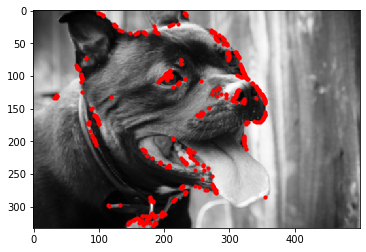

In [41]:
plt.imshow(imgray, cmap='gray')
for point in corners:
    plt.scatter(point[0], point[1], s=10, color='r')
plt.show()

In [0]:
len(imgs_test)

2051

In [0]:
import time
feature_list = {}

t1 = time.time()

for i, img in enumerate(imgs_test):
    imgray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    imgray = cv2.GaussianBlur(imgray, (3, 3), 1)

    corners = detect(imgray)
    descriptors = get_brief_description(imgray, corners)

    feature_list[i] = descriptors

    if i % 100 == 0:
        print(i, (time.time() - t1) / 60)

0 0.023557746410369874
100 3.786071197191874
200 7.5449814915657045
300 12.077803122997285
400 16.035677683353423
500 19.657372470696767
600 23.74579259554545
700 27.596683363119762
800 31.862044898668923
900 35.83266600370407
1000 41.608573818206786
1100 46.626383964220686
1200 50.02124688625336
1300 54.19447768131892
1400 57.740150809288025
1500 61.711189504464464
1600 65.87572480042776
1700 69.68415026664734
1800 73.230268851916
1900 77.9257292787234
2000 81.65367883046468


In [0]:
from sklearn.cluster import KMeans

In [0]:
sample = []

for i, item in enumerate(feature_list.values()):
    sample.extend(item)

In [0]:
import json

with open('/content/drive/My Drive/data.json', 'w') as fp:
    json.dump(feature_list, fp)

In [0]:
import json

In [0]:
with open('data.json', 'r') as fp:
    feature_list = json.load(fp)

In [0]:
sample = []

for i, item in enumerate(feature_list.values()):
    sample.extend(item)

In [0]:
kmeans = KMeans(n_clusters=500, random_state=0).fit(sample)

In [0]:
prediction = kmeans.predict(sample)

In [0]:
with open('centers.json', 'w') as fp:
    json.dump(kmeans.cluster_centers_.tolist(), fp)

In [0]:
with open('centers.json', 'r') as fp:
    cluster_centers = json.load(fp)

In [0]:
kmeans = KMeans(n_clusters=500, random_state=0)

In [0]:
kmeans.cluster_centers_ = np.array(cluster_centers)

In [0]:
kmeans.predict(np.array(descriptors))

array([111, 429,  78, 189,  41, 289, 225, 336, 403,   7, 233, 239, 410,
       113, 464, 293, 491,  31,  89, 479, 271, 218, 325, 395, 331, 159,
       486,  81, 414, 470,   8, 272, 338, 412, 277, 216,  85,  72, 411,
       313, 319, 136, 360, 225, 170,  40, 481,  61, 431, 339, 103,  91,
       498, 255,  62, 187, 150, 345,  32,  57, 257, 248, 267, 428, 240,
       466, 235,  84, 311, 136, 206, 248, 168, 490, 279, 266, 432, 492,
       450, 109,  38,  77,  71, 401, 360, 417, 240, 331, 213, 323, 294,
       446, 431, 438, 186, 324, 231, 276,  13, 257, 444, 104, 181, 421,
       280, 116, 386, 355, 396, 407, 246, 161, 490,  73, 346,  45, 488,
        46, 451, 163, 485, 312, 126, 438, 420, 405, 306, 205, 486, 123,
        87, 305, 257, 105, 298, 154,  62, 468, 237, 149, 215, 265, 413,
       151,  53,  50, 157, 478, 266, 323,  64, 384, 152,  32, 441, 192,
       449,  33, 278, 417,  26, 300,  90, 336,  69, 148, 103, 175,  33,
       260, 493,   4, 279, 284, 238, 417,  63,  10,  62, 237, 39

In [0]:
import time
img_features = {}

t1 = time.time()

for i, img in enumerate(imgs_test):
    descriptors = feature_list[i]

    if len(descriptors) == 0:
        print(i)
        continue

    f = kmeans.predict(descriptors)

    res = np.zeros((500,))

    for j in f:
        res[j] += 1

    img_features[i] = res

    if i % 100 == 0:
        print(i, (time.time() - t1) / 60)

0 4.4910113016764325e-05
100 0.013885307312011718
140
200 0.028553287188212078
300 0.04731624523798625
400 0.0617619792620341
500 0.07537132501602173
600 0.09014725685119629
638
700 0.10343484481175741
800 0.11879288752873739
816
900 0.1348994771639506
1000 0.16101824045181273
1100 0.17766079902648926
1200 0.19065154393513997
1300 0.20830764373143515
1400 0.22175925175348918
1500 0.2377747853597005
1600 0.2551146070162455
1700 0.27065001328786215
1800 0.2842470089594523
1900 0.30406572024027506
2000 0.3179366230964661


In [0]:
len(nums_test)

2048

In [0]:
del nums_test[140]
del nums_test[638]
del nums_test[816]

In [0]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


In [0]:
with open('/content/drive/My Drive/img_features.json', 'w') as fp:
    json.dump(img_features, fp, cls=NumpyEncoder)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model = SVM()

In [0]:
vals = np.array(list(img_features.values()), dtype=np.float32)
res = np.array(nums_test).reshape(-1, 1)

In [0]:
model.train(vals[0:1500], res[0:1500], kernel=cv2.ml.SVM_INTER)

In [0]:
prediction = model.model.predict(vals[1500:])[1]

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(prediction, res[1500:])

0.014598540145985401

## Catboost

In [0]:
!pip install catboost

     |████████████████████████████████| 62.9MB 130kB/s 


In [0]:
from catboost import Pool, CatBoostClassifier

cat_features = [0]

train_dataset = Pool(data=vals[500:],
                     label=res[500:])

eval_dataset = Pool(data=vals[:500],
                    label=res[:500])

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=5000,
                           learning_rate=0.9,
                           depth=5,
                           task_type="GPU",
                           devices='0:1',
                           loss_function='MultiClass')
# Fit model
model.fit(train_dataset)
# Get predicted classes
preds_class = model.predict(eval_dataset)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(eval_dataset)
# Get predicted RawFormulaVal
preds_raw = model.predict(eval_dataset, 
                          prediction_type='RawFormulaVal')

0:	learn: 4.0402116	total: 58.9ms	remaining: 4m 54s
1:	learn: 3.9907728	total: 120ms	remaining: 4m 59s
2:	learn: 3.9236351	total: 180ms	remaining: 4m 59s
3:	learn: 3.9101373	total: 228ms	remaining: 4m 44s
4:	learn: 3.8988289	total: 281ms	remaining: 4m 40s
5:	learn: 3.8232548	total: 341ms	remaining: 4m 43s
6:	learn: 3.7610614	total: 393ms	remaining: 4m 40s
7:	learn: 3.7109589	total: 445ms	remaining: 4m 37s
8:	learn: 3.7025635	total: 491ms	remaining: 4m 32s
9:	learn: 3.6214754	total: 544ms	remaining: 4m 31s
10:	learn: 3.5233593	total: 596ms	remaining: 4m 30s
11:	learn: 3.3911123	total: 652ms	remaining: 4m 30s
12:	learn: 3.3678713	total: 697ms	remaining: 4m 27s
13:	learn: 3.3216174	total: 740ms	remaining: 4m 23s
14:	learn: 3.2987792	total: 776ms	remaining: 4m 17s
15:	learn: 3.2685695	total: 817ms	remaining: 4m 14s
16:	learn: 3.1567370	total: 867ms	remaining: 4m 14s
17:	learn: 3.0570128	total: 920ms	remaining: 4m 14s
18:	learn: 3.0052251	total: 962ms	remaining: 4m 12s
19:	learn: 2.9564155	

In [0]:
accuracy_score(preds_class, res[:500])

0.024